In [6]:
from wordcloud import WordCloud
import ujson as json


with open("news.json", "r", encoding="UTF-8") as f:
    data = json.load(f)

In [7]:
import re
from kiwipiepy import Kiwi

kiwi = Kiwi()
def clean(texts):
    cleaned_texts = []
    remove_keywords = ['null', 'license', 'comments', 'id', 'co kr', 'tt']

    for text in texts:
        text = re.sub(r'<[^>]+>','',text) #html 태그 삭제
        text = re.sub(r'(http|https|ftp)"//(?:[-\w.]|(?:%[\da-fA-F]{2}))+','',text) #url 삭제
        text = re.sub(r"([a=zA=Z0=9_.+-]+@[a-zA-Z0-9]+\.[a-zA-Z0-9-.]+)",'',text) # 이메일 삭제
        text = re.sub(r'\s+', '', text) #공백삭제
        text = re.sub('([ㄱ-ㅎ ㅏ-ㅣ]+)', '',text) #자음 모음만 있는경우 삭제
        text = re.sub('[^\w\s]', '', text) # 특수기호 삭제

        for keyword in remove_keywords:
            text = re.sub(fr'\b{re.escape(keyword)}\b', '', text, flags=re.IGNORECASE)

        text = re.sub(r'\s+', ' ', text).strip() 
        
        cleaned_texts.append(text)
    return cleaned_texts


<>:15: SyntaxWarning: invalid escape sequence '\w'
<>:15: SyntaxWarning: invalid escape sequence '\w'
C:\Users\김동준\AppData\Local\Temp\ipykernel_9392\1995243257.py:15: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('[^\w\s]', '', text) # 특수기호 삭제


In [8]:
def extract_noun(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG', 'NNP']:
            yield token.form

if isinstance(data, list):
    raw_texts = [item["text"] for item in data if "text" in item]  # 'text' 필드 추출
else:
    raw_texts = [data]  # 문자열 형태라면 그대로 사용

cleaned_texts = clean(raw_texts)

nouns = []
for cleaned_text in cleaned_texts:
    nouns.extend(extract_noun(cleaned_text))

In [9]:
nouns_text = " ".join(nouns) # 리스트를 문자열로 변환 
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로 설정 (예: 맑은 고딕)
    width=800,
    height=400,
    background_color="white"
).generate(nouns_text)
wordcloud.words_

{'지수': 1.0,
 '미국': 0.6428571428571429,
 '실적 발표': 0.42857142857142855,
 '금리 인하': 0.39285714285714285,
 '종목': 0.35714285714285715,
 '연준': 0.32142857142857145,
 '시장': 0.32142857142857145,
 '지표': 0.32142857142857145,
 '주': 0.32142857142857145,
 '가상 화폐': 0.32142857142857145,
 '강세': 0.2857142857142857,
 '코스피': 0.2857142857142857,
 '하락': 0.2857142857142857,
 '뉴욕 증시': 0.2857142857142857,
 '증시': 0.25,
 '고용': 0.25,
 '산업': 0.25,
 '비트코인': 0.25,
 '자산': 0.25,
 '트럼프 대통령': 0.25,
 '가운데': 0.21428571428571427,
 '포인트': 0.21428571428571427,
 '금리': 0.21428571428571427,
 '가능': 0.21428571428571427,
 '준비': 0.21428571428571427,
 '필요': 0.21428571428571427,
 '결정': 0.21428571428571427,
 '기준': 0.21428571428571427,
 '대비': 0.21428571428571427,
 '상승': 0.21428571428571427,
 '가격': 0.21428571428571427,
 '연구원': 0.21428571428571427,
 '경기 침체': 0.21428571428571427,
 '전망': 0.17857142857142858,
 '둔화': 0.17857142857142858,
 '은행': 0.17857142857142858,
 '회의': 0.17857142857142858,
 '보고서': 0.17857142857142858,
 '이번': 0.178571428571

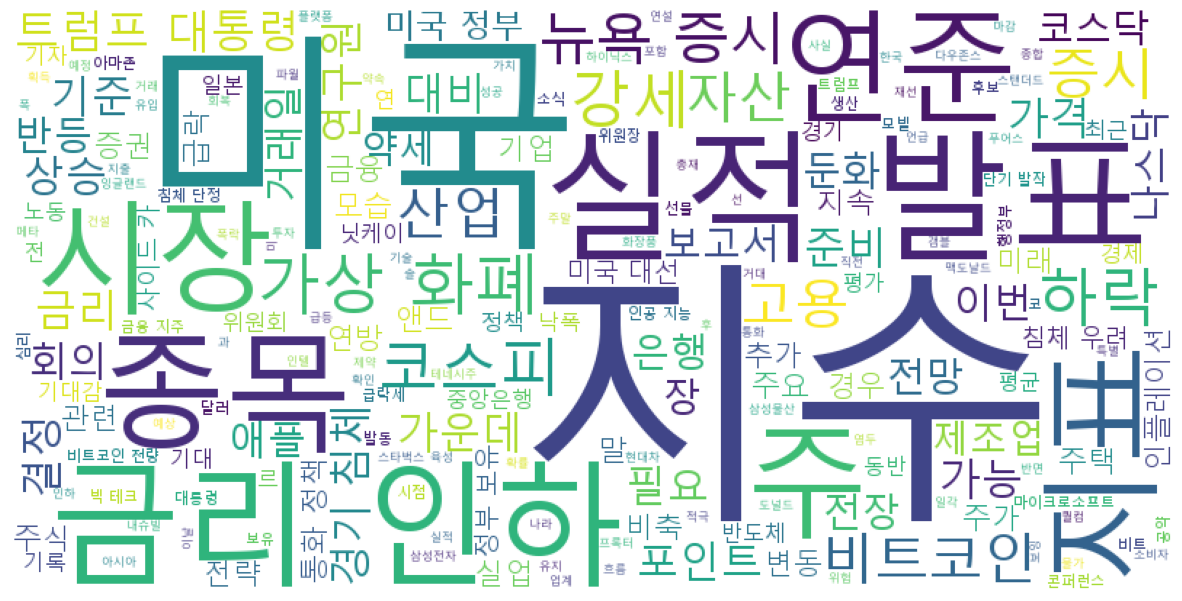

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = ((15,10)))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()